In [415]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [416]:
df = pd.read_csv('Data/stud.csv')

In [417]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Creating X and y variables

In [418]:
X = df.drop(['math_score', 'reading_score'], axis=1)
y = df['reading_score']

In [419]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,writing_score
0,female,group B,bachelor's degree,standard,none,74
1,female,group C,some college,standard,completed,88
2,female,group B,master's degree,standard,none,93
3,male,group A,associate's degree,free/reduced,none,44
4,male,group C,some college,standard,none,75


In [420]:
y.head()

0    72
1    90
2    95
3    57
4    78
Name: reading_score, dtype: int64

In [421]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [422]:
X = preprocessor.fit_transform(X)

In [423]:
X.shape

(1000, 18)

In [424]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape

((800, 18), (200, 18))

In [425]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [426]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.9524
- Mean Absolute Error: 3.1933
- R2 Score: 0.9234
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3741
- Mean Absolute Error: 3.6303
- R2 Score: 0.9228


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.4058
- Mean Absolute Error: 3.5207
- R2 Score: 0.9049
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7554
- Mean Absolute Error: 3.9165
- R2 Score: 0.9087


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.9480
- Mean Absolute Error: 3.1934
- R2 Score: 0.9236
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3668
- Mean Absolute Error: 3.6114
- R2 Score: 0.9230


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7640
- Mean Absolute Error: 4.5395
- R2 Score: 0.8372
-----------------------

In [427]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.923019
0,Linear Regression,0.922759
7,CatBoosting Regressor,0.917286
5,Random Forest Regressor,0.914655
8,AdaBoost Regressor,0.911155
1,Lasso,0.908707
6,XGBRegressor,0.903540
4,Decision Tree,0.858947
3,K-Neighbors Regressor,0.803039


In [428]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 92.28


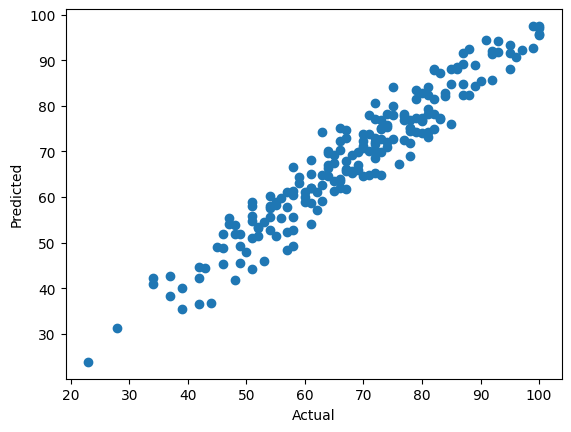

In [429]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

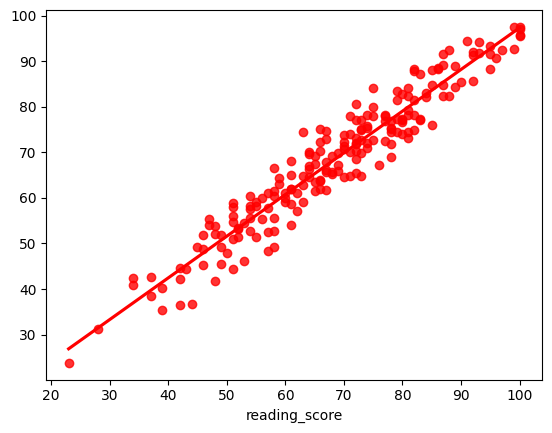

In [430]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [432]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
339,55,59.0000,-4.0000
233,87,82.3750,4.6250
727,51,58.9375,-7.9375
533,88,92.4375,-4.4375
693,77,72.5000,4.5000
...,...,...,...
275,78,74.4375,3.5625
470,85,88.0000,-3.0000
594,100,95.5000,4.5000
895,34,42.3125,-8.3125
